In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.gridspec as gridspec

import corner

import binary_c
import xrb
import xrb.src.constants as c
from xrb.binary import binary_evolve
from xrb.src import stats
from xrb.SF_history import sf_history


from xrb.src.core import *
set_data_path("../data")


%matplotlib inline

In [15]:
c.sf_scheme = "LMC"

start = time.time()

sampler = stats.run_emcee_population(nburn=10000, nsteps=10000, nwalkers=80, binary_scheme='binary_c')

end = time.time()

print "Elapsed time:", end-start, "seconds"

Elapsed time: 29058.2405231 seconds


/home/andrews/Research/XRB/xrb/SF_history/sf_history.py:192: RuntimeWarning: invalid value encountered in log10
  return sfh[index](np.log10(t_b*1.0e6))


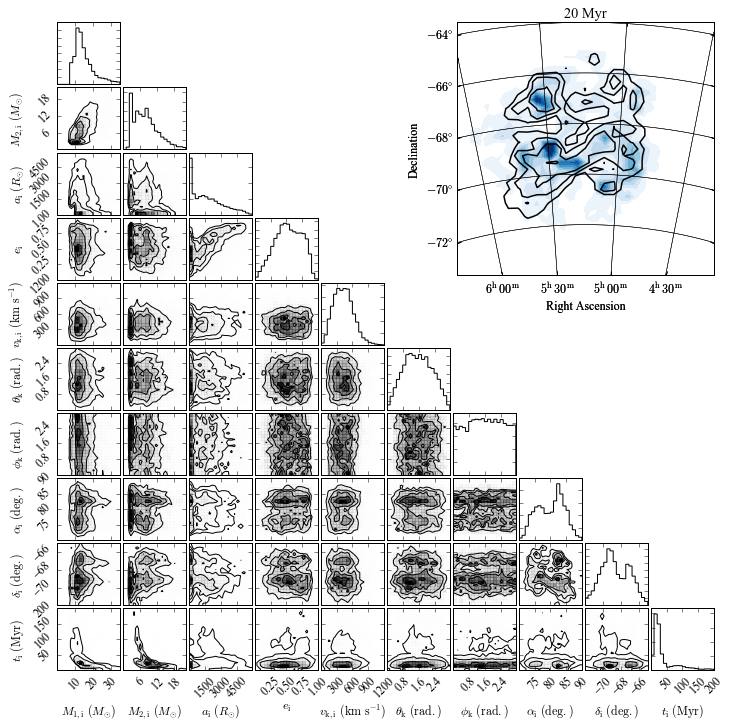

In [20]:
# Corner plot
fontProperties = {'family':'serif', 'serif':['Times New Roman'], 'weight':'normal', 'size':12}
ticks_font = font_manager.FontProperties(family='Times New Roman', style='normal', \
                                         weight='normal', stretch='normal', size=12)
plt.rc('font', **fontProperties)

fig, ax = plt.subplots(10,10, figsize=(10,10))


labels = [r"$M_{\rm 1, i}\ (M_{\odot})$", r"$M_{\rm 2, i}\ (M_{\odot})$", r"$a_{\rm i}\ (R_{\odot})$", \
          r"$e_{\rm i}$", r"$v_{\rm k, i}\ ({\rm km}\ {\rm s}^{-1})$", r"$\theta_{\rm k}\ ({\rm rad.})$", \
          r"$\phi_{\rm k}\ ({\rm rad.})$", r"$\alpha_{\rm i}\ ({\rm deg.})$", \
          r"$\delta_{\rm i}\ ({\rm deg.}) $", r"$t_{\rm i}\ ({\rm Myr})$"]
plt_range = ([0,35], [0,22], [0,5900], [0,1], [0,1200], [0,np.pi], [0,np.pi], [70,90], [-72,-65], [0,200])

hist2d_kwargs = {"plot_datapoints" : False}
fig = corner.corner(sampler.flatchain, fig=fig, labels=labels, range=plt_range, max_n_ticks=4, **hist2d_kwargs)
# fig = corner.corner(sampler.flatchain, fig=fig, labels=labels, max_n_ticks=4, **hist2d_kwargs)

ra_out = sampler.flatchain.T[7]
dec_out = sampler.flatchain.T[8]
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[3,2],
                       height_ratios=[2,3]
                       )
smc_plot, ax1 = sf_history.get_plot_polar(20, fig_in=fig, gs=gs[1], ra_dist=ra_out, dec_dist=dec_out, \
                                          dist_bins=30, xgrid_density=6)


ax1.set_position([0.55, 0.55, 0.3, 0.3])


# Shift axis labels
for i in np.arange(10):
    ax[i,0].yaxis.set_label_coords(-0.5, 0.5)
    ax[9,i].xaxis.set_label_coords(0.5, -0.5)


plt.subplots_adjust(bottom=0.07, left=0.07, top=0.97)


plt.savefig('../population_lmc.pdf', rasterized=True)
# plt.show()

In [22]:
import pickle

pickle.dump(sampler, open("../data/LMC_sampler.obj", "wb"))